# One light source in varying coordinates in the XY plane when $z=0$
We know from the empiric Beer-Lambert law that:
$$I = I_0 e^{-\mu d}$$
Nevertheless, this distance $d$ refers to the radial distance traveled by the beam of light from the source until it exits the material. So using a rectangular coordiante system, $d$ is given by:

$$d = |\vec(r)| = \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}$$

So the Beer-Lambert law can be rewritten as:
$$I = I_0 e^{-\mu \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}}$$

An ideal point light source has a uniform distribution of light intensity over space (represented by $I_0$ in the Beer-Lambert law). We are interested in working with LEDs whose light intensity is not distributed uniformly in space, but is actually angle dependent (see Kingbright datasheet of APHHS1005SURCK, the graph of spatial distribution is 1 at a 0° angle and diminishes following a cosine function until it reaches a value of 0 at 90°). We are interested in the projection of the cosine over the z axis, which in rectangular coordiates is given by:

$$I_0 = I_0(\vec{r}) = \cos(\theta) = \frac{(z-z_0)}{\sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}}$$

Substituting this in the Beer-Lambert law, we have:

$$I(\vec{r}) = \frac{(z-z_0)}{\sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}} \exp^{-\mu \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}}$$

Using that $d = \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0^2)}$,
$$\boxed{I(\vec{r}) = \frac{(z-z_0)}{d} \exp^{-\mu d}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
def one_light_one_point(mu, x, y, z, x0, y0, z0=0):
    d = np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)
#     return np.exp(-mu*z) # azimuth dependence
#     return np.exp(-mu*d) #radial dependence
    return (z-z0)/d * np.exp(-mu*d) # The angle dependence of an LED is included in the first term here!


def vectorized_one_light(mu, xx, yy, z, x0, y0, z0=0): # Be careful you might have transposed space.
    # xx and yy are variables, but the depth is fixed
    
    if np.shape(xx) != np.shape(yy):
        print("Different length arrays.")
    
    iteration_length_1, iteration_length_2 = np.shape(xx)
    matrix = np.array([np.zeros(iteration_length_1) for row in range(iteration_length_2)])
        
    for i in range(iteration_length_1):
        for j in range(iteration_length_2):
            matrix[i][j] = one_light_one_point(mu, xx[i][j], yy[i][j], z, x0, y0, z0)
            
    return matrix


def three_D_one_light(mu, xx, yy, zz, x0, y0, z0=0):
    #Create a function. For each infinitesimal volumetric input, there is an expected light intensity output.
    # xx, yy and zz are 3D-arrays, where each volumetric point is defined by a single index.
    
    if np.shape(xx) != np.shape(yy):
        print("Different length arrays.")
    elif np.shape(xx) != np.shape(zz):
        print("Different length arrays.")
    
    it_length_1, it_length_2, it_length_3 = np.shape(xx)
    matrix = np.array([[np.zeros(it_length_1) for row in range(it_length_2)] for width in range(it_length_3)])
    
    for i in range(it_length_1):
        for j in range(it_length_2):
            for k in range(it_length_3):
                
                matrix[i][j][k] = one_light_one_point(mu, xx[i][j][k], yy[i][j][k], zz[i][j][k], x0, y0, z0)
            
    return matrix

In [3]:
def indices_to_be_found(number, x_, y_, z_):
    '''
        number should be in all the domains: x_, y_ and z_
    '''
    difference_array_x = np.absolute(x_-number)
    difference_array_y = np.absolute(y_-number)
    difference_array_z = np.absolute(z_-number)
    
    index_x = difference_array_x.argmin()
    index_y = difference_array_y.argmin()
    index_z = difference_array_z.argmin()
    
    return index_x, index_y, index_z

### Placing a light source in the origin.

In [4]:
mu = 1
x0, y0, z0 = 0, 0, 0
pixels_n = 101

x_ = np.linspace(-5, 5, pixels_n)
y_ = np.linspace(-5, 5, pixels_n)
z_ = np.linspace(0, 5, pixels_n)

xx, yy, zz = np.meshgrid(x_, y_, z_, indexing='ij')
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)


# one_light_one_point(mu, x, y, z, x0, y0)
# matrix = vectorized_one_light(mu, xx, yy, z, x0, y0)
matrix = three_D_one_light(mu, xx, yy, zz, x0, y0, z0)                         

/var/folders/m7/qbp_1p_d1rv995c1pqpsdcp00000gn/T/ipykernel_14410/2236207379.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (z-z0)/d * np.exp(-mu*d) # The angle dependence of an LED is included in the first term here!


Note the previous function might return a RuntimeWarning. This is because of a division by zero when all the values are zero in the origin.

In [5]:
matrix.shape

(101, 101, 101)

In the next cell, change the value of `number` to a value between [0,5] to visualize different volumetric projections in 2D planes.

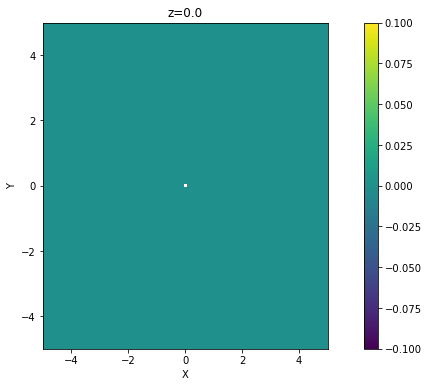

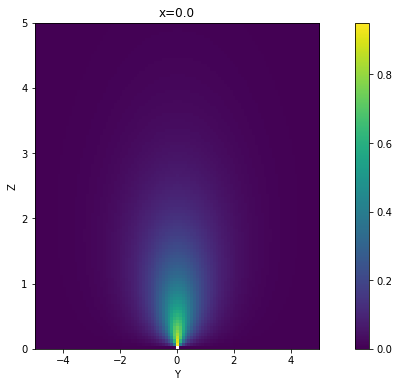

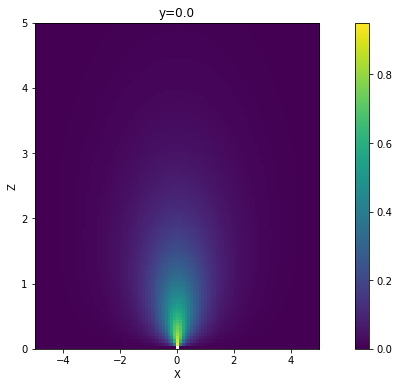

In [6]:
# Visualizing the 3 volumetric projections defined by a plane when fixing one of the three variables in 'number'.
number = 0
index_x, index_y, index_z = indices_to_be_found(number, x_, y_, z_)

# Projection in the X-Y plane, expected figure is the circle with exponentially decaying intensities.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,:,index_z].T, origin="lower", interpolation='none', extent=[-5,5, -5, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("z="+str(z_[index_z]))
# https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the Y-Z plane, expected figure is the traingle one with decaying intensities along the medium.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[index_x,:,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("x="+str(x_[index_x]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the X-Z plane, expected figure is the traingle one with exponentially decaying intensities
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,index_y,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("y="+str(y_[index_y]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

### In the previous and following graphs, please note the scale bar!

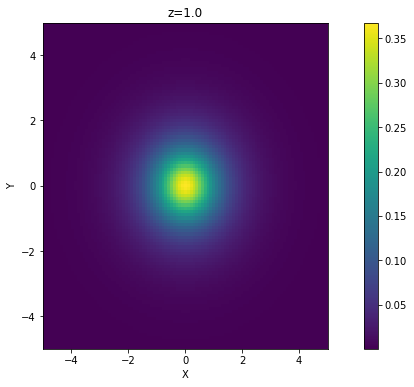

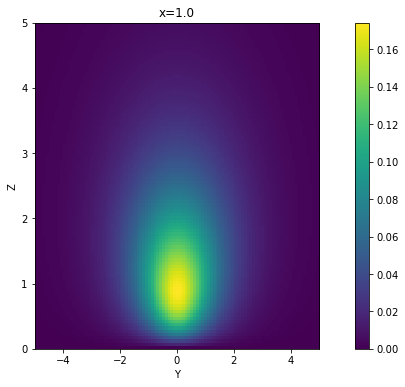

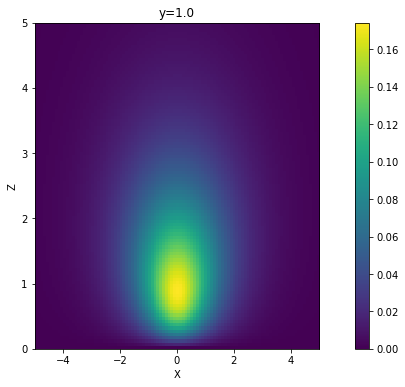

In [7]:
# Visualizing the 3 volumetric projections defined by a plane when fixing one of the three variables in 'number'.
number = 1
index_x, index_y, index_z = indices_to_be_found(number, x_, y_, z_)

# Projection in the X-Y plane, expected figure is the circle with exponentially decaying intensities.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,:,index_z].T, origin="lower", interpolation='none', extent=[-5,5, -5, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("z="+str(z_[index_z]))
# https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the Y-Z plane, expected figure is the traingle one with decaying intensities along the medium.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[index_x,:,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("x="+str(x_[index_x]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the X-Z plane, expected figure is the traingle one with exponentially decaying intensities
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,index_y,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("y="+str(y_[index_y]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

### Changing the location of the light source.

In [8]:
mu = 1
x0, y0, z0 = 0, 2, 0
pixels_n = 101

x_ = np.linspace(-5, 5, pixels_n)
y_ = np.linspace(-5, 5, pixels_n)
z_ = np.linspace(0, 5, pixels_n)

xx, yy, zz = np.meshgrid(x_, y_, z_, indexing='ij')

matrix = three_D_one_light(mu, xx, yy, zz, x0, y0, z0)     

/var/folders/m7/qbp_1p_d1rv995c1pqpsdcp00000gn/T/ipykernel_14410/2236207379.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (z-z0)/d * np.exp(-mu*d) # The angle dependence of an LED is included in the first term here!


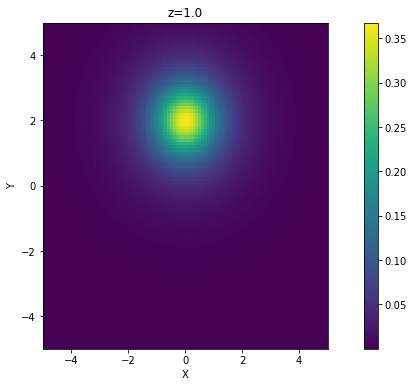

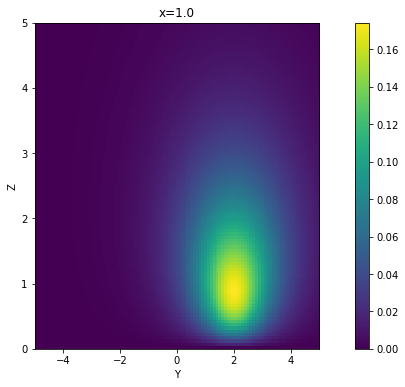

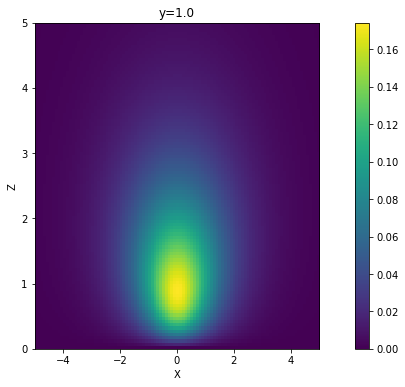

In [9]:
# Visualizing the 3 volumetric projections defined by a plane when fixing one of the three variables in 'number'.
number = 1
index_x, index_y, index_z = indices_to_be_found(number, x_, y_, z_)

# Projection in the X-Y plane, expected figure is the circle with exponentially decaying intensities.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,:,index_z].T, origin="lower", interpolation='none', extent=[-5,5, -5, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("z="+str(z_[index_z]))
# https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the Y-Z plane, expected figure is the traingle one with decaying intensities along the medium.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[index_x,:,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("x="+str(x_[index_x]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the X-Z plane, expected figure is the traingle one with exponentially decaying intensities
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,index_y,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("y="+str(y_[index_y]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

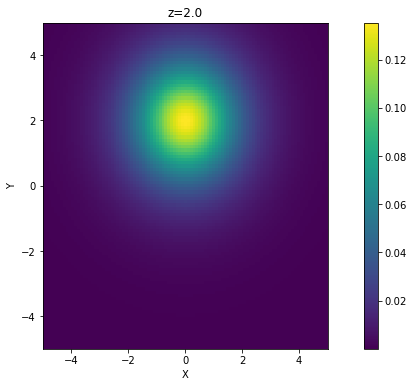

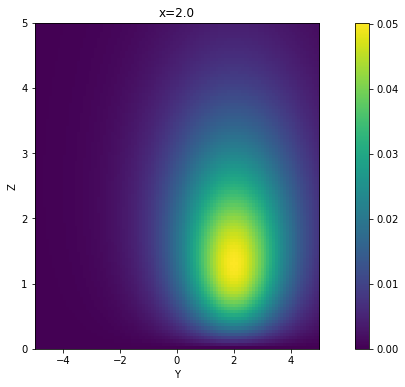

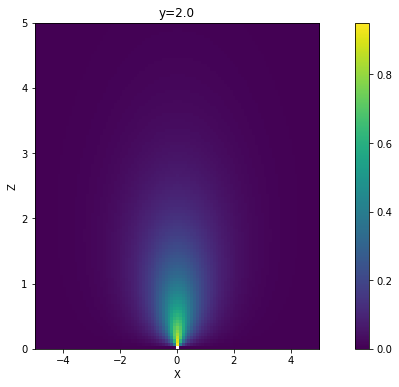

In [10]:
# Visualizing the 3 volumetric projections defined by a plane when fixing one of the three variables in 'number'.
number = 2
index_x, index_y, index_z = indices_to_be_found(number, x_, y_, z_)

# Projection in the X-Y plane, expected figure is the circle with exponentially decaying intensities.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,:,index_z].T, origin="lower", interpolation='none', extent=[-5,5, -5, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("z="+str(z_[index_z]))
# https://matplotlib.org/stable/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py
# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.5 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the Y-Z plane, expected figure is the traingle one with decaying intensities along the medium.
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[index_x,:,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("x="+str(x_[index_x]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Projection in the X-Z plane, expected figure is the traingle one with exponentially decaying intensities
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(matrix[:,index_y,:].T, origin="lower", interpolation='none', extent=[-5,5, 0, 5], aspect="auto")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("y="+str(y_[index_y]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax)
plt.show()

# Notes

- When retrieving information from the matrices, make sure to reference them in the appropriate manner. See this for reference: https://www.geeksforgeeks.org/how-to-retrieve-an-entire-row-or-column-of-an-array-in-python/

- You transposed the matrix in order to visualize it with the axis you expected.